In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
data = pd.read_csv("data/wbes_sintetico.csv")

cols = [
    "training",
    "access_finance",
    "exporter",
    "competition_level",
    "sales_annual_usd"
]

df = data[cols].dropna()


In [14]:
promedio = df["sales_annual_usd"].mean()

df["successful"] = np.where(
    df["sales_annual_usd"] > promedio,
    1,
    0
)


In [15]:
data_bn = pd.DataFrame({
    "training": df["training"],
    "financing": df["access_finance"],
    "exporter": df["exporter"],
    "competition": df["competition_level"],
    "successful": df["successful"]
})


In [16]:
prob_success = (
    data_bn
    .groupby(["training", "financing"])["successful"]
    .mean()
    .reset_index()
)


In [17]:
prob_success["Etiqueta"] = (
    "Training=" + prob_success["training"].astype(str)
    + " y Finance=" + prob_success["financing"].astype(str)
)


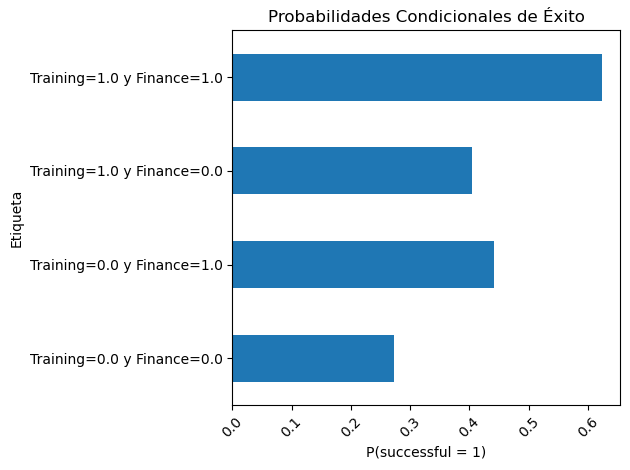

In [18]:
fig, ax = plt.subplots()

prob_success.plot(
    kind="barh",
    x="Etiqueta",
    y="successful",
    ax=ax,
    legend=False
)

ax.set_xlabel("P(successful = 1)")
ax.set_title("Probabilidades Condicionales de Éxito")

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("probabilidades_condicionales_exito.png")
plt.show()


El financiamiento aumenta la capacidad de inversión y expansión, lo que eleva la probabilidad de éxito. La capacitación mejora el capital humano y la productividad, incrementando también la probabilidad de alcanzar mayores ventas. Ambas variables influyen positivamente y de forma complementaria en el éxito empresarial

¿Cuál modelo es más útil para un responsable de políticas públicas?

El modelo mss util para un responsable de políticas públicas es la regresión logística complementada con la red bayesiana

La regresión logística permite identificar qué variables influyen significativamente en la probabilidad de éxito empresarial y cuantificar su impacto, lo que facilita priorizar intervenciones. Por su parte, la red bayesiana ayuda a entender las relaciones probabilísticas y posibles efectos indirectos entre financiamiento, capacitación y éxito, permitiendo simular escenarios y evaluar políticas antes de implementarlas